# 자동차 리콜 데이터 분석

---

## 프로젝트 목표
- 한국교통안전공단 자동차 결함 리콜 데이터를 분석하여 유의미한 정보 도출
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

---

## 프로젝트 목차
1. **데이터 읽기:** 자동차 리콜 데이터를 불러오고 Dataframe 구조를 확인<br>
    1.1. 데이터 불러오기<br>
<br> 
2. **데이터 정제:** 결측치 확인 및 기초적인 데이터 변형<br>
    2.1. 결측치 확인<br>
    2.2. 중복값 확인<br>
    2.3. 기초적인 데이터 변형<br>
<br>
3. **데이터 시각화:** 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악<br>
    3.1. 제조사별 리콜 현황 출력<br>
    3.2. 모델별 리콜 현황 출력<br>
    3.3. 월별 리콜 현황 출력<br>
    3.4. 생산연도별 리콜 현황 출력<br>
    3.5. 4분기 제조사별 리콜 현황 출력<br>
    3.6. 하반기 생산연도별 리콜 현황 출력<br>
    3.7. 워드 클라우드를 이용한 리콜 사유 시각화<br>

---

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

---

## 프로젝트 개요

리콜(recall)은 제품의 설계, 제조 단계에서 결함이 발견되었을 시 문제 예방의 차원에서 판매자가 무상으로 수리, 점검 및 교환을 해주는 소비자 보호 제도입니다. 집집마다 개인용 자동차를 보유하게 되면서 자동차는 어느덧 우리 삶의 일상재가 되었지만, 안전성에 대해서는 산발적인 문제 제기가 계속되고 있고, 이에 따라 전격적인 자동차 리콜 사태도 종종 발생하여 화제를 모으곤 합니다.

이번 프로젝트에서는 한국교통안전공단에서 제공한 2020년 자동차 결함 리콜 데이터를 활용하여 유의미한 패턴 및 인사이트를 발굴하고 시각화하는 실습을 진행하도록 하겠습니다.

---

## 1. 데이터 읽기

필요한 패키지 설치 및 `import`한 후 `pandas`를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인합니다.

### 1.1. 데이터 불러오기

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
# pd.read_csv를 통하여 dataframe 형태로 읽어옵니다.
df = pd.read_csv('./data/한국교통안전공단_자동차결함 리콜현황_20221231.csv',encoding='euc_kr')
df


,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


In [5]:
# 상위 5개 데이터를 출력합니다.
df.head()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."


In [6]:
# 상위 10개 데이터를 출력합니다.
df.head(10)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,2014-11-05,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,2011-02-28,2012-09-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,2014-12-19,2015-02-26,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
5,폭스바겐그룹코리아 주식회사,Golf 1.6 TDI BMT,2010-07-02,2012-10-01,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."
6,메르세데스벤츠코리아(주),GLC 220 d 4MATIC,2020-08-06,2020-08-06,2022-01-07,크랭크샤프트의 내구성 부족으로 인해 엔진 부하가 높을 경우 크랭크샤프트가 파손될 수...
7,메르세데스벤츠코리아(주),E 220 d 4MATIC,2020-08-26,2020-08-26,2022-01-07,크랭크샤프트의 내구성 부족으로 인해 엔진 부하가 높을 경우 크랭크샤프트가 파손될 수...
8,메르세데스벤츠코리아(주),GLE 350 e 4MATIC Coupe,2020-03-25,2021-01-26,2022-01-07,연료탱크 압력 센서의 고정 클립이 내식성 부족으로 장기간 운행 시 고정 클립이 부식...
9,메르세데스벤츠코리아(주),GLE 350 e 4MATIC,2020-03-27,2021-01-25,2022-01-07,연료탱크 압력 센서의 고정 클립이 내식성 부족으로 장기간 운행 시 고정 클립이 부식...


In [7]:
# 하위 5개 데이터를 출력합니다.
df.tail()

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...
1418,화창상사(주),CHIEF VINTAGE,2019-08-02,2020-06-04,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       1419 non-null   object
 1   차명        1419 non-null   object
 2   생산기간(부터)  1419 non-null   object
 3   생산기간(까지)  1419 non-null   object
 4   리콜개시일     1419 non-null   object
 5   리콜사유      1419 non-null   object
dtypes: object(6)
memory usage: 66.6+ KB


In [13]:
df.shape

(1419, 6)

In [14]:
df.isnull().sum()

제작자         0
차명          0
생산기간(부터)    0
생산기간(까지)    0
리콜개시일       0
리콜사유        0
dtype: int64

In [ ]:
# dataframe 정보를 요약하여 출력합니다. 


1. 행 수, 관측치 수:  1419개
2. 컬럼 수, 피처 수, 변수 개수:   6개
3. 피쳐별 타입 적절성: 날짜 변화 필요할 듯 datetime
4. 결측치 개수: 없음
------------------------------------
5. 중복값 개수 확인: ?? -> 다음 부터는 중복값도 확인해야함.

---

## 2. 데이터 정제

데이터를 읽고 확인했다면 결측값(missing data), 중복값(duplicates)을 처리하고 열 이름 변경과 같은 기초적인 데이터 변형을 진행해봅시다.

### 2.1. 결측치 확인

`isnull()` 함수를 이용하여 결측치를 확인해봅시다.

In [15]:
# 각 열 별로 결측치의 갯수를 반환합니다. (True:1, False:0)
# 근데 이거 매년 달라져서 다른 데이터에는 결측치 있을 수 있음.
df.isnull().sum()


제작자         0
차명          0
생산기간(부터)    0
생산기간(까지)    0
리콜개시일       0
리콜사유        0
dtype: int64

### 2.2. 중복값 확인

`duplicated()` 함수를 이용하여 중복값을 확인해봅시다.

In [17]:
df.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
1414    False
1415    False
1416    False
1417    False
1418    False
Length: 1419, dtype: bool

In [32]:
# keep = False를 넣어줘야 중복데이터가 나옴
df[df.duplicated(keep=False)]

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
303,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
304,대전기계공업(주),W800,2019-02-21,2022-02-10,2022-03-28,경음기에 전기 배선을 연결하는 단자의 내구성 부족으로 주행 중 특정한 엔진 회전 영...
392,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
393,메르세데스벤츠코리아(주),A 220,2021-09-16,2021-09-16,2022-04-08,비상 통신 시스템(eCall)을 위한 통신 모듈 소프트웨어가 사양에 맞지 않아 차량...
527,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
528,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-05-02,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1144,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1145,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1216,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."
1217,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."


`drop_duplicates()` 함수를 이용하여 중복값을 제거합니다.

In [33]:
print("Before:", len(df))   # 데이터의 총 관측치 개수 - 1419
df = df.drop_duplicates()   # 지우기
print("After:", len(df))    # 중복값 지우고 나서 5개가 삭제됨.

Before: 1419
After: 1414


### 2.3. 기초적인 데이터 변형

In [34]:
target = ['생산기간(부터)', '생산기간(까지)', '리콜개시일']
name = ['생산', '종료', '리콜']

for idx, target in enumerate(target):
    df[target] = pd.to_datetime(df[target])
    df[f'{name[idx]}_년'] = df[target].dt.year.astype('int64')
    df[f'{name[idx]}_월'] = df[target].dt.month.astype('int64')
    df[f'{name[idx]}_일'] = df[target].dt.day.astype('int64')
    df.drop(target, axis = 1, inplace = True)

C:\Users\82104\AppData\Local\Temp\ipykernel_26144\4157857155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target] = pd.to_datetime(df[target])
C:\Users\82104\AppData\Local\Temp\ipykernel_26144\4157857155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{name[idx]}_년'] = df[target].dt.year.astype('int64')
C:\Users\82104\AppData\Local\Temp\ipykernel_26144\4157857155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,제작자,차명,리콜사유,생산_년,생산_월,생산_일,종료_년,종료_월,종료_일,리콜_년,리콜_월,리콜_일
0,혼다코리아(주),CBR1000RR-R,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,2021,4,29,2021,5,12,2022,1,3
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,17,2014,11,25,2022,1,5
2,폭스바겐그룹코리아 주식회사,Jetta 6 FL 2.0 TDI 110PS,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,5,2015,2,26,2022,1,5
3,폭스바겐그룹코리아 주식회사,Jetta 1.6 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2011,2,28,2012,9,25,2022,1,5
4,폭스바겐그룹코리아 주식회사,Golf A7 1.6 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,12,19,2015,2,26,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2021,11,22,2022,10,24,2022,12,26
1415,비엠더블유코리아(주),BMW i4 eDrive40,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,2021,11,23,2022,10,24,2022,12,26
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...,2020,2,11,2022,4,29,2022,12,27
1417,화창상사(주),SPRINGFIELD,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...,2019,10,28,2020,6,3,2022,12,27


In [ ]:
# 생산기간(부터) 컬럼을 종료_년, 종료_월, 종료_일 컬럼으로 분해




In [ ]:
# 생산기간(까지) 컬럼을 종료_년, 종료_월, 종료_일 컬럼으로 분해





# 리콜개시일 컬럼을 리콜_년, 리콜_월, 리콜_일 컬럼으로 분해







In [ ]:
# 불필요한 열은 버림('생산기간(부터)', '생산기간(까지)', '리콜개시일')



본 분석에서는 2022년의 데이터만을 대상으로하므로, 그 외의 데이터가 있다면 삭제해주겠습니다.

In [ ]:
# 리콜_년 피처에 2022년만 있는지 체크


---

## 3. 데이터 시각화

각 column의 변수별로 어떠한 데이터 분포를 하고 있는지 시각화를 통하여 알아봅시다.

### 3.1. 제조사별 리콜 현황 출력

제조사별 리콜 건수 분포를 막대 그래프로 확인해보겠습니다.

In [25]:
df.head(2)    # 리콜건수가 가장 많은 회사는?

,제작자,차명,리콜사유,생산_년,생산_월,생산_일,종료_년,종료_월,종료_일,리콜_년,리콜_월,리콜_일
0,혼다코리아(주),CBR1000RR-R,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...,2021,4,29,2021,5,12,2022,1,3
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...",2014,11,17,2014,11,25,2022,1,5


In [33]:
tmp1 = df.groupby(by='제작자').count().sort_values(by = '차명', ascending=False)['차명']

In [34]:
tmp1.index

Index(['비엠더블유코리아(주)', '메르세데스벤츠코리아(주)', '폭스바겐그룹코리아 주식회사', '현대자동차(주)',
       '만트럭버스코리아(주)', '기아주식회사', '포드세일즈서비스코리아(유)', '(주)에프엠케이', '스텔란티스코리아주식회사',
       '(주)재규어랜드로버코리아', '(유)기흥모터스', '포르쉐코리아 주식회사', '테슬라코리아 유한회사', '화창상사(주)',
       '혼다코리아(주)', '(주)볼보자동차코리아', '스카니아코리아그룹(주)', '다임러트럭코리아(주)',
       '르노코리아자동차 주식회사', '한국토요타자동차(주)', '(주)피라인', '지엠코리아(주)', '범한자동차 주식회사',
       '볼보트럭코리아(주)', '대전기계공업(주)', '(주) 바이크코리아', '한국지엠(주)', '(주) 한국모터트레이딩',
       '(주)다산중공업', '모토스타코리아(주)', '기흥인터내셔널 유한회사', '유한회사 모토로싸', '주식회사 마이브',
       '(주)스포츠모터사이클코리아', '폴스타오토모티브코리아 유한회사', '한신특장'],
      dtype='object', name='제작자')

In [35]:
tmp1.values

array([432, 329, 216,  61,  41,  38,  37,  31,  31,  24,  21,  20,  20,
        16,  15,  13,   9,   9,   7,   5,   5,   4,   4,   4,   3,   3,
         3,   3,   2,   2,   1,   1,   1,   1,   1,   1], dtype=int64)

In [43]:
tmp_df = df.groupby(by = '제작자').size().sort_values(ascending=False).to_frame('리콜건수')

In [44]:
tmp_df.head(3)

,리콜건수
제작자,
비엠더블유코리아(주),432
메르세데스벤츠코리아(주),329
폭스바겐그룹코리아 주식회사,216


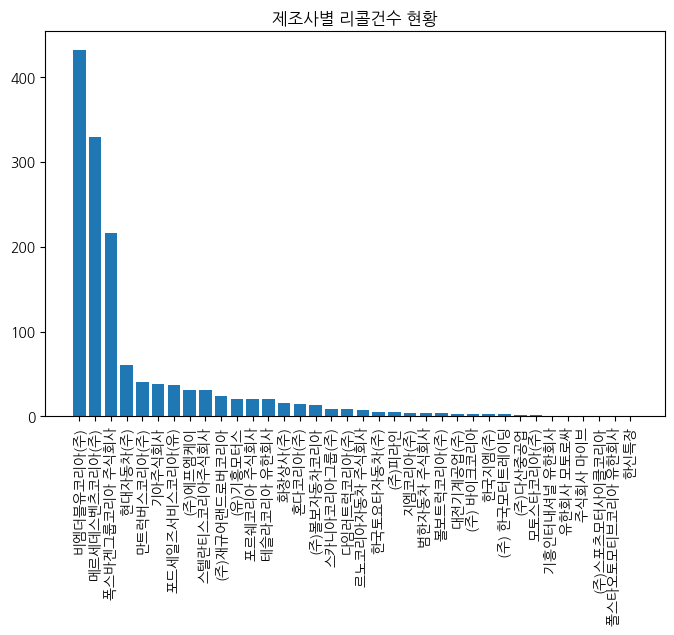

In [53]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family ='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 현상 해결

plt.figure(figsize = (8,5))
plt.bar(tmp_df.index, tmp_df['리콜건수'].values)
plt.xticks(rotation = 90)
plt.title('제조사별 리콜건수 현황')
plt.show()

In [55]:
x = tmp_df.head(10).index
y = tmp_df.head(10)['리콜건수'].values

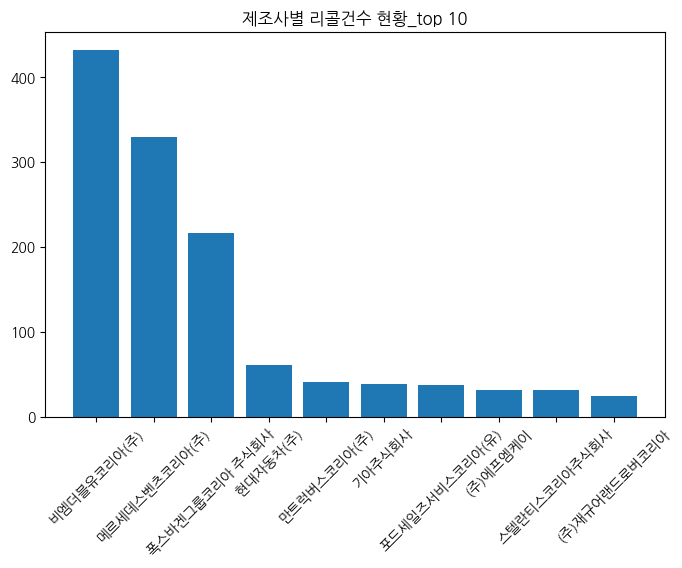

In [59]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family ='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 현상 해결

x = tmp_df.head(10).index
y = tmp_df.head(10)['리콜건수'].values

plt.figure(figsize = (8,5))
plt.bar(x = x, height=y)
plt.xticks(rotation = 45)
plt.title('제조사별 리콜건수 현황_top 10')
plt.show()

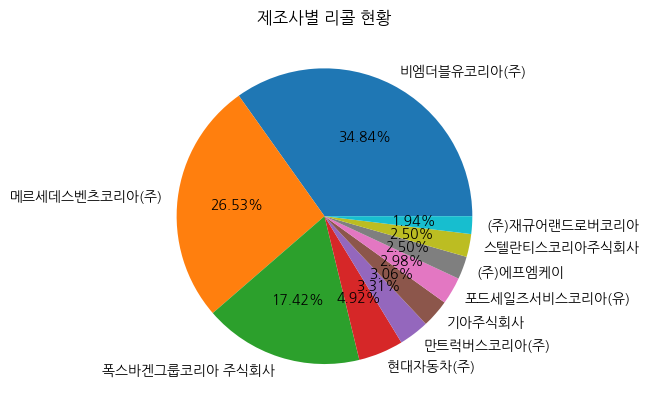

In [69]:
x = tmp_df.head(10).index
z = tmp_df.head(10)['리콜건수'].values

plt.pie(z, labels = x, autopct='%.2f%%')
plt.title('제조사별 리콜 현황')
plt.show()

### 3.2. 모델별 리콜 현황 출력

차량 모델별 리콜 건수 분포를 막대 그래프로 확인해보겠습니다.

In [84]:
df
tmp = df.groupby(by='차명').size().sort_values(ascending=False).to_frame('count').head(50)


모델은 굉장히 많으므로, 상위 50개 모델만 뽑아서 시각화를 진행해보겠습니다.

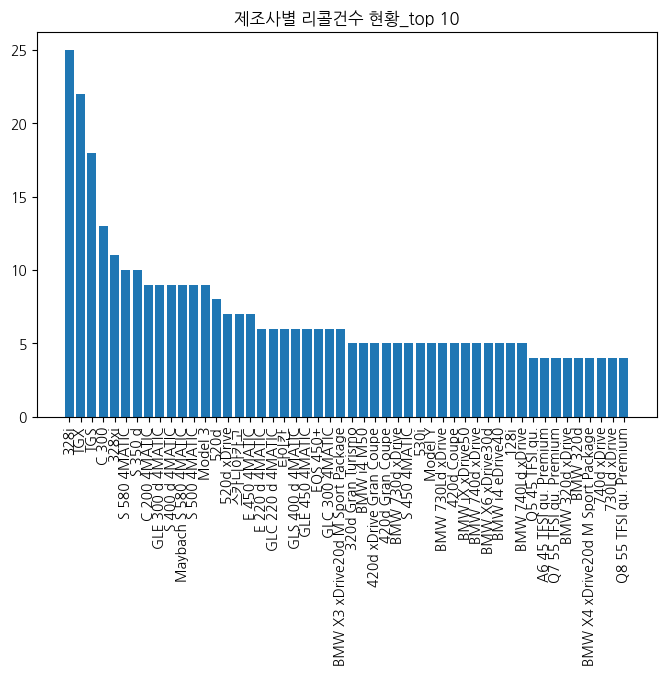

In [87]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family ='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 현상 해결

x = tmp.index
y = tmp['count'].values

plt.figure(figsize = (8,5))
plt.bar(x = x, height=y)
plt.xticks(rotation = 90)
plt.title('제조사별 리콜건수 현황_top 10')
plt.show()

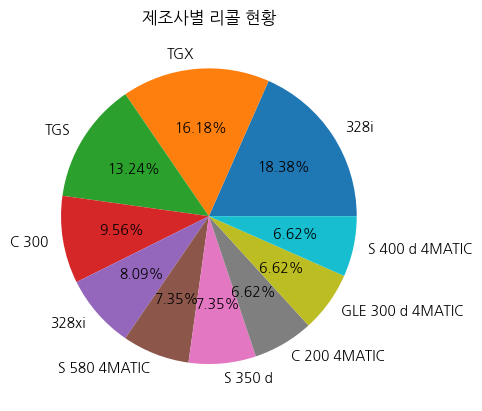

In [89]:
# 파이차트로
x = tmp.head(10).index
z = tmp.head(10)['count'].values

plt.pie(z, labels = x, autopct='%.2f%%')
plt.title('제조사별 리콜 현황')
plt.show()

### 3.3. 월별 리콜 현황 출력

월별 리콜 건수 분포를 막대 그래프로 확인해보겠습니다.

In [100]:
df.head(2)
tmp = df.groupby(by='리콜_월').size().sort_values(ascending=False).to_frame('count')

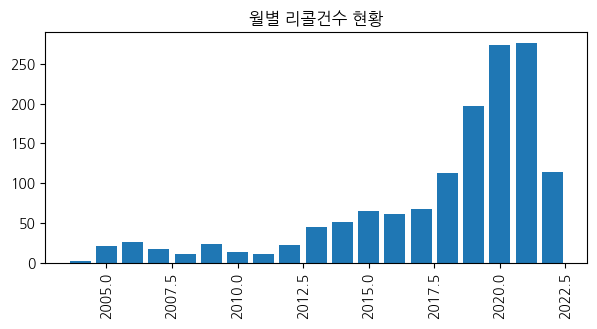

In [106]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family ='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 현상 해결

x = tmp.index
y = tmp['count'].values

plt.figure(figsize = (7,3))
plt.bar(x = x, height=y)
plt.xticks(rotation = 90)
plt.title('월별 리콜건수 현황')
plt.show()

### 3.4. 생산연도별 리콜 현황 출력

이번에는 생산연도별 리콜 현황을 꺾은선 그래프로 알아보겠습니다.

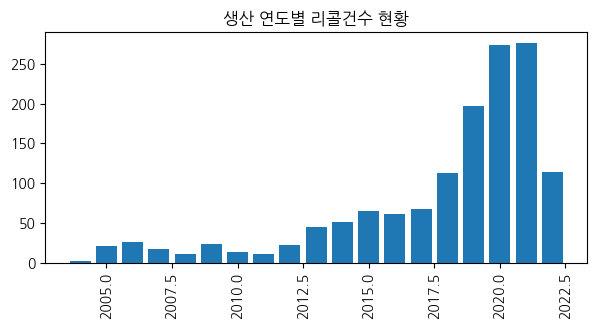

In [107]:
tmp = df.groupby(by='생산_년').size().sort_values(ascending=False).to_frame('count')

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family ='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 현상 해결

x = tmp.index
y = tmp['count'].values

plt.figure(figsize = (7,3))
plt.bar(x = x, height=y)
plt.xticks(rotation = 90)
plt.title('생산 연도별 리콜건수 현황')
plt.show()

#### 퀴즈 1. 2022년에 리콜 개시가 가장 많이 일어난 달(month)과 가장 적게 일어난 달의 차이(건수)를 구하세요.

In [112]:
df.head(2)
df.groupby('리콜_월').size().max() - df.groupby('리콜_월').size().min()


122

### 3.5. 4분기 제조사별 리콜 현황 출력

가장 최근 데이터인 2022년 4분기(10, 11, 12월) 제조사별 리콜 현황을 시각화해봅시다.

In [117]:
df_4 =df[df['리콜_월'].isin([10,11,12])]

In [118]:
tmp = df_4.groupby('제작자').size().sort_values(ascending=False).to_frame('count')

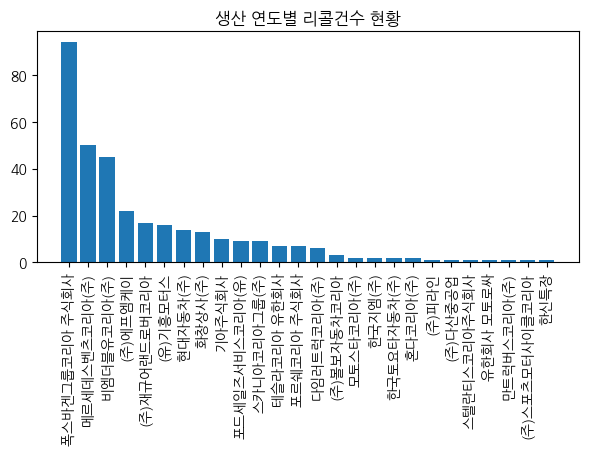

In [119]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family ='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 현상 해결

x = tmp.index
y = tmp['count'].values

plt.figure(figsize = (7,3))
plt.bar(x = x, height=y)
plt.xticks(rotation = 90)
plt.title('생산 연도별 리콜건수 현황')
plt.show()

### 3.6. 하반기 생산연도별 리콜 현황 출력

이번에는 2022년 하반기(7~12월)에 개시된 리콜 건들을 생산 개시 연도를 기준으로 시각화해봅시다.

### 3.7. 워드 클라우드를 이용한 리콜 사유 시각화

워드 클라우드를 이용하여 리콜 사유를 시각화해보도록 하겠습니다.

In [2]:
# 워드 클라우드 생성을 도와주는 패키지를 가져옵니다.
from wordcloud import WordCloud, STOPWORDS

In [3]:
# 문법적인 성분들을 배제하기 위해 stopwords들을 따로 저장해둡니다.
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

영어를 사용할 때는 상관 없지만, 우리말을 쓸 때에는 적합하지 않습니다. 여기서는 예시로 몇 개의 stopwords들을 수기로 저장해보겠습니다.

In [4]:
# 손으로 직접 리콜 사유와 관련이 적은 문법적 어구들을 배제해보겠습니다.
spwords = set(["동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당"])

In [8]:
df['리콜사유']

0       제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1       특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...
2       특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...
3       특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...
4       특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ...
                              ...                        
1414    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415    배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416    메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417    차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...
1418    차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...
Name: 리콜사유, Length: 1419, dtype: object

In [9]:
df['리콜사유'].drop_duplicates().values

array(['제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되지 않아 라디에이터 내부 압력을 일정하게 유지할 수 없습니다. 이로 인해 라디에이터 내부 압력이 높아지면 냉각수 저장 탱크의 오버플로 튜브에서 냉각수가 분출될 수 있습니다.',
       '특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 내 오일 압력 생성기(어큐뮬레이터)의 나사산이 날카롭게 가공되어, 사용 기간 중 어큐뮬레이터 하우징에 미세 균열이 발생하여 충분한 변속 압력 생성에 지장을 줄 가능성이 있습니다.',
       '크랭크샤프트의 내구성 부족으로 인해 엔진 부하가 높을 경우 크랭크샤프트가 파손될 수 있습니다.',
       '연료탱크 압력 센서의 고정 클립이 내식성 부족으로 장기간 운행 시 고정 클립이 부식될 수 있고, 고정력이 상실되어 연료 탱크 압력 센서가 헐거워질 수도 있습니다.',
       '일부 대상 차량의 엔진컨트롤유닛 소프트웨어 오류로 EGR(배기가스 재순환 장치) 배관 내 온도가 상승할 수 있습니다. 또한 EGR 쿨러 (배기가스 재순환 냉각기)의 내구성 부족에 의한 미세 균열로 냉각수가 누수 될 수 있습니다.',
       'BMW 자체 품질 조사 결과 2021년 11월 22일부터 2021년 11월 30일까지 제작된 BMW i4 eDrive40, i4 M50 차량 72대의 차량 생산 과정에서 고전압 배터리 충격 완화 패드*가 장착되지 않았을 가능성을 확인하였습니다. *고전압 배터리 충격 완화 패드: 배터리와 차대 사이에 장착되어 측면 충돌 시 차대가 고전압 배터리에 손상을 입히는 것을 최소화하는 장치',
       '엔진 컨트롤 유닛의 소프트웨어 오류로 인해 엔진 시동 후 차량 도난방지 장치(vehicle immobilizer)의 데이터를 엔진 컨트롤 유닛에 저장하지 못할 수 있습니다.',
       '파워트레인 컨트롤 유닛의 소프트웨어 오류로 인해 차량 운행 중 파워트레인 컨트롤 유닛이 의

워드 클라우드를 생성하고 시각화해보겠습니다.

In [10]:
text = ' '.join(df['리콜사유'].values)

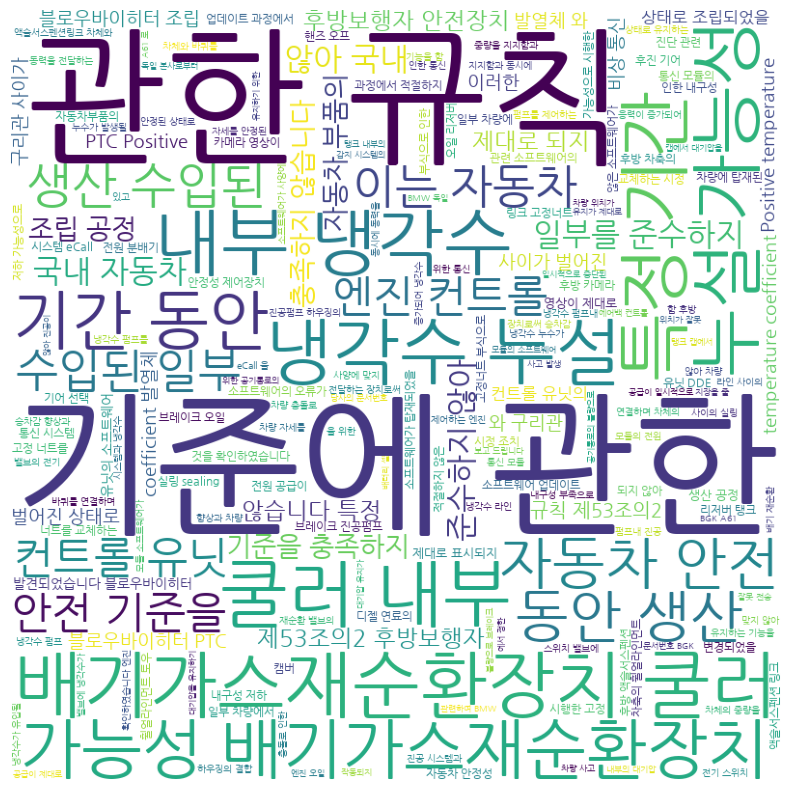

In [13]:
# 손으로 직접 리콜 사유와 관련이 적은 문법적 어구들을 배제해보겠습니다.
spwords = set(["성능과", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당"])

# 한글을 사용하기 위해서는 폰트를 지정해주어야 합니다.
font_path = './NanumGothic.ttf'
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=font_path,
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

#### 퀴즈 2. 기아자동차(주)의 제품 중 가장 최근에 리콜이 개시된 제품의 모델명을 구하세요. 

In [30]:
df.head(2)

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,혼다코리아(주),CBR1000RR-R,2021-04-29,2021-05-12,2022-01-03,제작 공정 중 라디에이터 캡의 제조 불량으로 라디에이터 캡과 필러넥이 제대로 밀착되...
1,폭스바겐그룹코리아 주식회사,Polo 5 FL 1.4 TDI BMT,2014-11-17,2014-11-25,2022-01-05,"특정 기간 내에 특정 공급 업체(이드낙)의 생산 공정 불량으로 인해, 메카트로닉스 ..."


In [40]:
# 내가 찾은 것
df[df['제작자'] == '기아주식회사'].sort_values(['리콜_년', '리콜_월', '리콜_일'], ascending=False)['차명']


1258                      카니발
1259                      카니발
1237         쏘렌토R (XM 페이스리프트)
1221            니로 EV(SG2 EV)
1222                  니로(SG2)
1214                 스포티지(SL)
1187                 쏘렌토(MQ4)
1120                스포티지(NQ5)
1121           쏘렌토R(XM페이스리프트)
1122           니로 플러스(DE PBV)
993                 올뉴쏘렌토(UM)
994                 올뉴카니발(YP)
855                   EV6(CV)
833                  그랜버드(GZ)
806                  스포티지(QL)
807                  셀토스(SP2)
809                  스포티지(QL)
810                  셀토스(SP2)
564                   EV6(CV)
534                    K9(KH)
410                    K7(VG)
363        쏘렌토 하이브리드(MQ4 HEV)
364                  쏘렌토(MQ4)
353     K5플러그인하이브리드 (JF PHEV)
354          K5하이브리드 (JF HEV)
270                  쏘렌토(MQ4)
271                  카니발(KA4)
272                  카니발(KA4)
248           스포티지 (QL/QL PE)
249            쏘렌토 (UM/UM PE)
260                    쏘울(PS)
261                  카니발(KA4)
146                 레이(TAMPE)
147       

In [41]:
# 강사님이 찾은 것
kia_df = df[df['제작자'].str.contains('기아')].sort_values(by = ['리콜_년', '리콜_월', '리콜_일'], ascending=False)

In [42]:
kia_df.iloc[0,1]

'카니발'